<a href="https://colab.research.google.com/github/aroos0786/wordcount/blob/master/python1234.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from IPython.display import display
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, silhouette_score, pairwise_distances
from sklearn.cluster import KMeans

In [ ]:
def readingDatasets(file_path, columns_options=None, header_options=None):
    obtained_dataset = pd.read_csv(file_path, header=header_options, names=columns_options)
    display(obtained_dataset.head())
    return obtained_dataset

def analyzing_datasets(req_dataset, column_labels):
    display(req_dataset.describe())
    special_classes = req_dataset[column_labels].unique() #uniques_classes
    print(f"\nThe Classes exists in dataset: {special_classes}\n")
    print("No of Data Rows having each class:")
    for datalabels in special_classes:
        rows = len(req_dataset[req_dataset[column_labels] == datalabels])
        print(f"{rows} number of data rows for {datalabels} class.")
    
def datasets_preprocessing(req_dataset, columns_label):   #preprocess _  datasets
    dataset_columns = req_dataset.columns
    for columns in dataset_columns:
        if columns != columns_label:
            req_dataset[columns] = req_dataset[columns] / req_dataset[columns].max()
    
    display(req_dataset)
    return req_dataset

def ploting_charts_of_classes(req_dataset, label_column):
    class_labels = req_dataset[label_column].unique()
    class_rows = {}
    for class_label in class_labels:
        class_rows[class_label] = len(req_dataset[req_dataset[label_column] == class_label])

    class_names = [name for name, _ in class_rows.items()]
    class_count = [count for _, count in class_rows.items()]

    fig, ax = plt.subplots(figsize=(15, 5))
    ax.barh(class_names, class_count, color="darkorange")

    plt.xlabel("Number of Data Rows per Class")
    plt.ylabel("Class Name")
    ax.set_title("Number of Data for each Class in the Dataset")
    ax.set_yticks([0, 1, 2])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color="grey", linestyle='-', linewidth=0.25, alpha=0.85)    

In [ ]:
def get_Class_With_Highest_DataRows(req_dataset, label_column):
    class_rows = {}
    for data_label in req_dataset[label_column].unique():
        class_rows[data_label] = len(req_dataset[req_dataset[label_column] == data_label])
    
    sorted_class_rows = sorted(class_rows.items(), key=lambda x:x[1], reverse=True)
    return sorted_class_rows[0]


def getting_DataRows_Length(class_with_most_data, imbalance_percentage, remaining_classes):
    new_dataset_total_rows = round((class_with_most_data[1] / imbalance_percentage) * 100)
    remaining_percentage_of_classes = 100 - imbalance_percentage
    remaining_data_of_classes = round(((new_dataset_total_rows / 100) * remaining_percentage_of_classes) / remaining_classes ) 
    
    return remaining_data_of_classes


def save_Data_Frame(req_dataset, obt_dataset, last_index, limit=None):
    dataset_columns = req_dataset.columns
    current_index = last_index
    for _, data in req_dataset.iterrows():
        if current_index <= (limit + last_index):
            for column in dataset_columns:
                obt_dataset.at[current_index, column] = data[column]

            current_index += 1
     
    return obt_dataset, current_index


def creating_Subset(req_dataset, class_with_most_data, remaining_classes_rows, remaining_classes, label_column):
    new_dataset = pd.DataFrame(columns=req_dataset.columns)
    index = 0
    most_class_data = req_dataset[req_dataset[label_column] == class_with_most_data[0]]
    new_dataset, index = save_Data_Frame(req_dataset, most_class_data, last_index=index, limit=class_with_most_data[1])
    
    for datalabels in remaining_classes:
        dataset_class_data = req_dataset[req_dataset[label_column] == datalabels]
        obt_dataset, index = save_Data_Frame(dataset_class_data, new_dataset, last_index=index, limit=remaining_classes_rows)
    
    return obt_dataset

def getImbalanceSubset(dataset, label_column, imbalance_percentage):
    class_with_most_data = get_Class_With_Highest_DataRows(dataset, label_column)
    remaining_classes = list(dataset[label_column].unique())
    remaining_classes.remove(class_with_most_data[0])
    
    remaining_classes_rows = getting_DataRows_Length(class_with_most_data, imbalance_percentage, len(remaining_classes))
    imbalance_dataset = creating_Subset(dataset, class_with_most_data, remaining_classes_rows, remaining_classes, label_column)
    
    analyzing_datasets(imbalance_dataset, column_labels=label_column)
    
    return imbalance_dataset

In [ ]:
# Yahan dataset read karna  ok 
#yahan pr uodate krna hey columns k name 
wine_columns = ["class", "Alcohol",
 	"Malic acid",
 	"Ash",
	"Alcalinity of ash",  
 	"Magnesium",
	"Total phenols",
 	"Flavanoids",
 	"Nonflavanoid phenols",
 	"Proanthocyanins",
	"Color intensity",
 	"Hue",
 	"OD280/OD315 of diluted wines", "Proline"
] 
	 
zoo_columns = ["class",
	 "hair",
	 "feathers",
	 "eggs",
	 "milk",
	 "airborne",
	 "aquatic",
	 "predator",
	 "toothed",
	 "backbone",
	 "breathes",
	 "venomous",
	 "fins",
	 "legs",
	 "tail",
	 "domestic",
	 "catsize",
	 "type"
]

breast_cancer_columns = [
	"class",
	"age",
	"menopause",
	"tumor-size",
	"inv-nodes",
	"node-caps",
	"deg-malig",
	"breast",
	"breast-quad",
	"irradiat"
]	 
# Yeah hai read-dataset, dataset read ka function
zoo_dataset = readingDatasets(file_path="zoo.data", columns_options=zoo_columns)
breast_cancer_dataset = readingDatasets(file_path="breast-cancer.data", columns_options= breast_cancer_columns)
wine_dataset = readingDatasets(file_path="wine.data", columns_options=wine_columns)

,class,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# Dataset ki anlaysis ka function
analyzing_datasets(wine_dataset, column_labels="class")  #wine analysation
analyzing_datasets(zoo_dataset, column_labels="class")  #zoo analysation
analyzing_datasets(breast_cancer_dataset, column_labels="class")  #breast cancer analysation

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000



The Classes exists in dataset: [1 2 3]

No of Data Rows having each class:
59 number of data rows for 1 class.
71 number of data rows for 2 class.
48 number of data rows for 3 class.


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000



The Classes exists in dataset: ['aardvark' 'antelope' 'bass' 'bear' 'boar' 'buffalo' 'calf' 'carp'
 'catfish' 'cavy' 'cheetah' 'chicken' 'chub' 'clam' 'crab' 'crayfish'
 'crow' 'deer' 'dogfish' 'dolphin' 'dove' 'duck' 'elephant' 'flamingo'
 'flea' 'frog' 'fruitbat' 'giraffe' 'girl' 'gnat' 'goat' 'gorilla' 'gull'
 'haddock' 'hamster' 'hare' 'hawk' 'herring' 'honeybee' 'housefly' 'kiwi'
 'ladybird' 'lark' 'leopard' 'lion' 'lobster' 'lynx' 'mink' 'mole'
 'mongoose' 'moth' 'newt' 'octopus' 'opossum' 'oryx' 'ostrich' 'parakeet'
 'penguin' 'pheasant' 'pike' 'piranha' 'pitviper' 'platypus' 'polecat'
 'pony' 'porpoise' 'puma' 'pussycat' 'raccoon' 'reindeer' 'rhea'
 'scorpion' 'seahorse' 'seal' 'sealion' 'seasnake' 'seawasp' 'skimmer'
 'skua' 'slowworm' 'slug' 'sole' 'sparrow' 'squirrel' 'starfish'
 'stingray' 'swan' 'termite' 'toad' 'tortoise' 'tuatara' 'tuna' 'vampire'
 'vole' 'vulture' 'wallaby' 'wasp' 'wolf' 'worm' 'wren']

No of Data Rows having each class:
1 number of data rows for aardv

,deg-malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000



The Classes exists in dataset: ['no-recurrence-events' 'recurrence-events']

No of Data Rows having each class:
201 number of data rows for no-recurrence-events class.
85 number of data rows for recurrence-events class.


In [ ]:
# Dataset ki pre-processing
wine_dataset = datasets_preprocessing(wine_dataset, columns_label="class")
zoo_dataset = datasets_preprocessing(zoo_dataset, columns_label="class")
# breast_cancer_dataset = datasets_preprocessing(breast_cancer_dataset, columns_label= "class")

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,0.959541,0.294828,0.752322,0.520000,0.783951,0.721649,0.602362,0.424242,0.639665,0.433846,0.608187,0.9800,0.633929
1,1,0.890088,0.306897,0.662539,0.373333,0.617284,0.682990,0.543307,0.393939,0.357542,0.336923,0.614035,0.8500,0.625000
2,1,0.887390,0.406897,0.826625,0.620000,0.623457,0.721649,0.637795,0.454545,0.784916,0.436923,0.602339,0.7925,0.705357
3,1,0.968982,0.336207,0.773994,0.560000,0.697531,0.992268,0.687008,0.363636,0.608939,0.600000,0.502924,0.8625,0.880952
4,1,0.892785,0.446552,0.888545,0.700000,0.728395,0.721649,0.529528,0.590909,0.508380,0.332308,0.608187,0.7325,0.437500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,0.924477,0.974138,0.758514,0.683333,0.586420,0.432990,0.120079,0.787879,0.296089,0.592308,0.374269,0.4350,0.440476
174,3,0.903574,0.674138,0.767802,0.766667,0.629630,0.463918,0.147638,0.651515,0.393855,0.561538,0.409357,0.3900,0.446429
175,3,0.894808,0.737931,0.699690,0.666667,0.740741,0.409794,0.135827,0.651515,0.377095,0.784615,0.345029,0.3900,0.497024
176,3,0.888065,0.446552,0.733746,0.666667,0.740741,0.425258,0.133858,0.803030,0.407821,0.715385,0.350877,0.4050,0.500000


,class,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0,0.142857
1,antelope,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0,0.142857
2,bass,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.00,1.0,0.0,0.0,0.571429
3,bear,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0,0.142857
4,boar,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.25,1.0,0.0,1.0,0.142857
97,wasp,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.75,0.0,0.0,0.0,0.857143
98,wolf,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0,0.142857
99,worm,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,1.000000


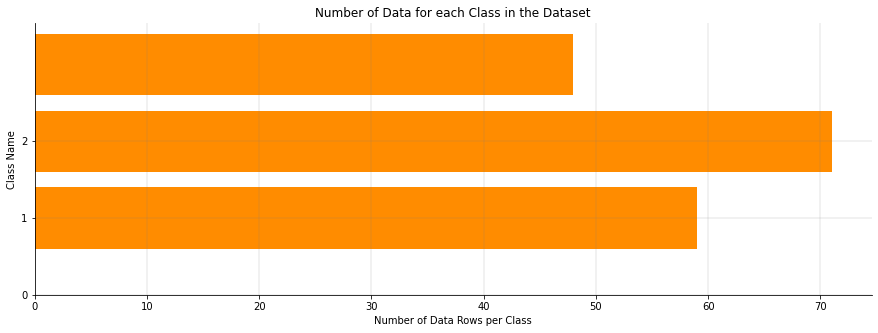

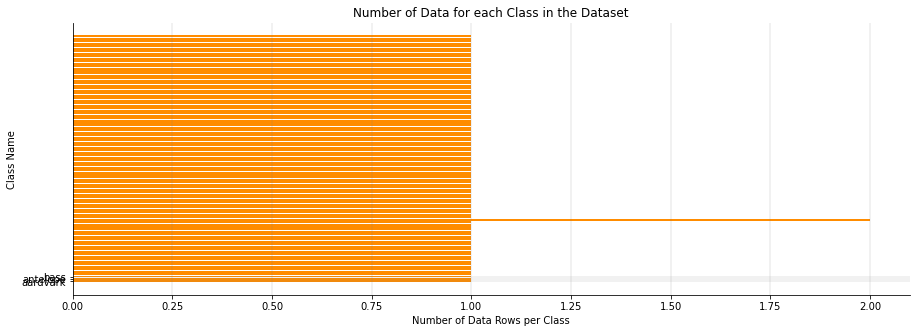

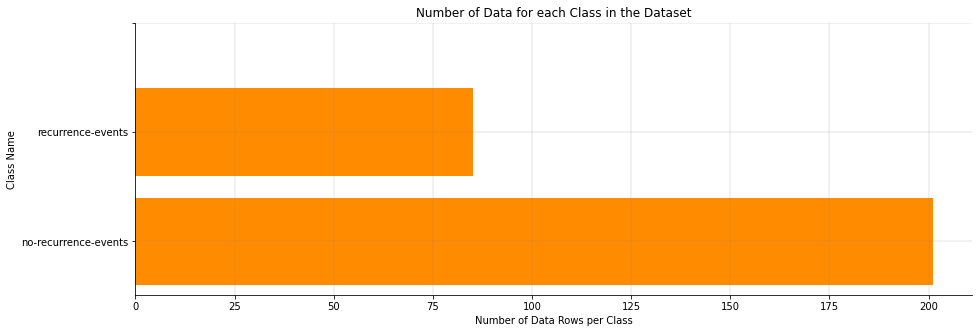

In [ ]:
# Yeah function classes ko plot kkrny liye, ky class ki kitni entries hain
ploting_charts_of_classes(wine_dataset, label_column="class")
ploting_charts_of_classes(zoo_dataset, label_column="class")
ploting_charts_of_classes(breast_cancer_dataset, label_column="class")


In [ ]:
# Yeah imbalance dataset ka function, ab last parameter imbalance_percentage, jitna imbalance dataset chaiye 
# uski percentage likh dena. jesy yahn 65, tu yeh low imbalance, agar 75 kar do gy tu mid imbalance hu jaye ga
low_imb_wine_dataset = getImbalanceSubset(wine_dataset, label_column="class", imbalance_percentage=65)
low_imb_zoo_dataset = getImbalanceSubset(zoo_dataset, label_column="class", imbalance_percentage=65)
low_imb_breast_cancer_dataset = getImbalanceSubset(breast_cancer_dataset, label_column="class", imbalance_percentage=65)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc[index, col] = value


,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,1.546154,0.898423,0.382003,0.744677,0.609231,0.629962,0.652339,0.484464,0.507692,0.465814,0.391172,0.589996,0.706423,0.542120
std,0.748244,0.055381,0.178350,0.083218,0.112912,0.079328,0.153705,0.192230,0.168891,0.162557,0.125887,0.113817,0.165770,0.211207
min,1.000000,0.743763,0.127586,0.421053,0.353333,0.481481,0.252577,0.066929,0.212121,0.114525,0.098462,0.315789,0.317500,0.203571
25%,1.000000,0.864295,0.277586,0.698142,0.533333,0.575617,0.545103,0.394193,0.393939,0.357542,0.304808,0.520468,0.631250,0.357143
50%,1.000000,0.909305,0.311207,0.743034,0.600000,0.623457,0.676546,0.529528,0.454545,0.480447,0.392308,0.608187,0.725000,0.546131
75%,2.000000,0.936952,0.437069,0.804180,0.676667,0.685185,0.760309,0.619587,0.606061,0.553073,0.461538,0.659357,0.832500,0.707589
max,3.000000,1.000000,1.000000,1.000000,0.950000,0.932099,1.000000,1.000000,0.954545,0.826816,0.723077,1.000000,1.000000,1.000000



The Classes exists in dataset: [2. 1. 3.]

No of Data Rows having each class:
31 number of data rows for 2.0 class.
79 number of data rows for 1.0 class.
20 number of data rows for 3.0 class.


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc[index, col] = value


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.441176,0.196078,0.568627,0.421569,0.235294,0.343137,0.549020,0.607843,0.823529,0.784314,0.068627,0.176471,0.351716,0.754902,0.127451,0.450980,0.394958
std,0.498980,0.398989,0.497714,0.496249,0.426277,0.477101,0.500049,0.490642,0.383103,0.413329,0.254068,0.383103,0.255345,0.432270,0.335124,0.500049,0.298292
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.250000,1.000000,0.000000,0.000000,0.142857
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.375000,1.000000,0.000000,0.000000,0.285714
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.500000,1.000000,0.000000,1.000000,0.571429
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



The Classes exists in dataset: ['elephant' 'flamingo' 'aardvark' 'antelope' 'bass' 'bear' 'boar'
 'buffalo' 'calf' 'carp' 'catfish' 'cavy' 'cheetah' 'chicken' 'chub'
 'clam' 'crab' 'crayfish' 'crow' 'deer' 'dogfish' 'dolphin' 'dove' 'duck'
 'flea' 'fruitbat' 'giraffe' 'girl' 'gnat' 'goat' 'gorilla' 'gull'
 'haddock' 'hamster' 'hare' 'hawk' 'herring' 'honeybee' 'housefly' 'kiwi'
 'ladybird' 'lark' 'leopard' 'lion' 'lobster' 'lynx' 'mink' 'mole'
 'mongoose' 'moth' 'newt' 'octopus' 'opossum' 'oryx' 'ostrich' 'parakeet'
 'penguin' 'pheasant' 'pike' 'piranha' 'pitviper' 'platypus' 'polecat'
 'pony' 'porpoise' 'puma' 'pussycat' 'raccoon' 'reindeer' 'rhea'
 'scorpion' 'seahorse' 'seal' 'sealion' 'seasnake' 'seawasp' 'skimmer'
 'skua' 'slowworm' 'slug' 'sole' 'sparrow' 'squirrel' 'starfish'
 'stingray' 'swan' 'termite' 'toad' 'tortoise' 'tuatara' 'tuna' 'vampire'
 'vole' 'vulture' 'wallaby' 'wasp' 'wolf' 'worm' 'wren']

No of Data Rows having each class:
1 number of data rows for elephant cla

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc[index, col] = value


,deg-malig
count,287.000000
mean,2.048780
std,0.736931
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000



The Classes exists in dataset: ['no-recurrence-events' 'recurrence-events']

No of Data Rows having each class:
201 number of data rows for no-recurrence-events class.
86 number of data rows for recurrence-events class.


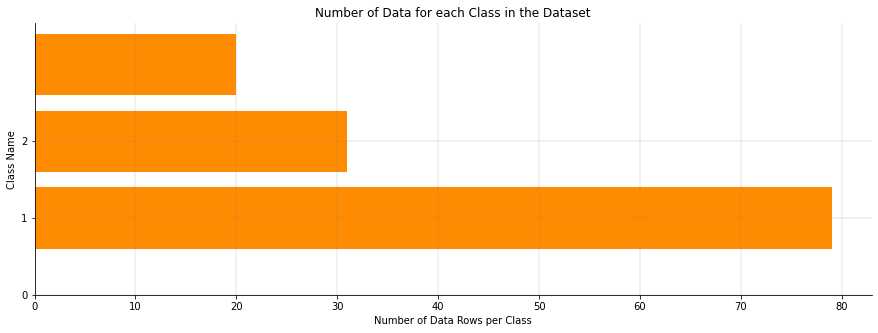

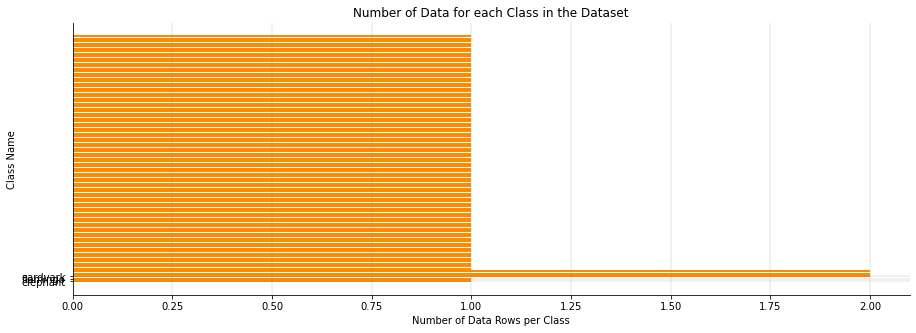

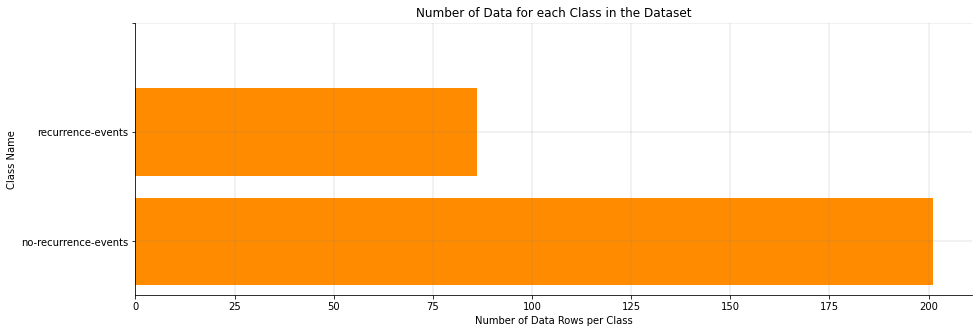

In [ ]:
ploting_charts_of_classes(low_imb_wine_dataset, label_column="class")
ploting_charts_of_classes(low_imb_zoo_dataset, label_column="class")
ploting_charts_of_classes(low_imb_breast_cancer_dataset, label_column="class")

In [ ]:
mid_imb_wine_dataset = getImbalanceSubset(wine_dataset, label_column="class", imbalance_percentage=75)
mid_imb_zoo_dataset = getImbalanceSubset(zoo_dataset, label_column="class", imbalance_percentage=75)
mid_imb_breast_cancer_dataset = getImbalanceSubset(breast_cancer_dataset, label_column="class", imbalance_percentage=75)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc[index, col] = value


,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,1.546154,0.888210,0.362931,0.734032,0.614410,0.621605,0.654223,0.488053,0.506177,0.474280,0.359349,0.595574,0.724885,0.512990
std,0.671820,0.057997,0.161121,0.090058,0.109234,0.079671,0.147716,0.174025,0.172534,0.163240,0.121698,0.102393,0.152339,0.212491
min,1.000000,0.743763,0.127586,0.421053,0.353333,0.481481,0.283505,0.092520,0.212121,0.114525,0.098462,0.385965,0.317500,0.185714
25%,1.000000,0.837492,0.274569,0.678793,0.540833,0.557099,0.567010,0.399606,0.393939,0.377095,0.260385,0.520468,0.678750,0.333631
50%,1.000000,0.892785,0.304310,0.736842,0.601667,0.617284,0.670103,0.527559,0.454545,0.486034,0.365385,0.608187,0.736250,0.498512
75%,2.000000,0.934592,0.406897,0.792570,0.682500,0.666667,0.760309,0.602362,0.590909,0.561453,0.436923,0.654971,0.836250,0.681548
max,3.000000,1.000000,1.000000,1.000000,0.950000,0.932099,1.000000,1.000000,1.000000,1.000000,0.684615,1.000000,1.000000,1.000000



The Classes exists in dataset: [2. 1. 3.]

No of Data Rows having each class:
45 number of data rows for 2.0 class.
72 number of data rows for 1.0 class.
13 number of data rows for 3.0 class.


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc[index, col] = value


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.441176,0.196078,0.568627,0.421569,0.235294,0.343137,0.549020,0.607843,0.823529,0.784314,0.068627,0.176471,0.351716,0.754902,0.127451,0.450980,0.394958
std,0.498980,0.398989,0.497714,0.496249,0.426277,0.477101,0.500049,0.490642,0.383103,0.413329,0.254068,0.383103,0.255345,0.432270,0.335124,0.500049,0.298292
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.250000,1.000000,0.000000,0.000000,0.142857
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.375000,1.000000,0.000000,0.000000,0.285714
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.500000,1.000000,0.000000,1.000000,0.571429
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



The Classes exists in dataset: ['elephant' 'flamingo' 'aardvark' 'antelope' 'bass' 'bear' 'boar'
 'buffalo' 'calf' 'carp' 'catfish' 'cavy' 'cheetah' 'chicken' 'chub'
 'clam' 'crab' 'crayfish' 'crow' 'deer' 'dogfish' 'dolphin' 'dove' 'duck'
 'flea' 'fruitbat' 'giraffe' 'girl' 'gnat' 'goat' 'gorilla' 'gull'
 'haddock' 'hamster' 'hare' 'hawk' 'herring' 'honeybee' 'housefly' 'kiwi'
 'ladybird' 'lark' 'leopard' 'lion' 'lobster' 'lynx' 'mink' 'mole'
 'mongoose' 'moth' 'newt' 'octopus' 'opossum' 'oryx' 'ostrich' 'parakeet'
 'penguin' 'pheasant' 'pike' 'piranha' 'pitviper' 'platypus' 'polecat'
 'pony' 'porpoise' 'puma' 'pussycat' 'raccoon' 'reindeer' 'rhea'
 'scorpion' 'seahorse' 'seal' 'sealion' 'seasnake' 'seawasp' 'skimmer'
 'skua' 'slowworm' 'slug' 'sole' 'sparrow' 'squirrel' 'starfish'
 'stingray' 'swan' 'termite' 'toad' 'tortoise' 'tuatara' 'tuna' 'vampire'
 'vole' 'vulture' 'wallaby' 'wasp' 'wolf' 'worm' 'wren']

No of Data Rows having each class:
1 number of data rows for elephant cla

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc[index, col] = value


,deg-malig
count,270.000000
mean,2.011111
std,0.729023
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,3.000000



The Classes exists in dataset: ['no-recurrence-events' 'recurrence-events']

No of Data Rows having each class:
201 number of data rows for no-recurrence-events class.
69 number of data rows for recurrence-events class.


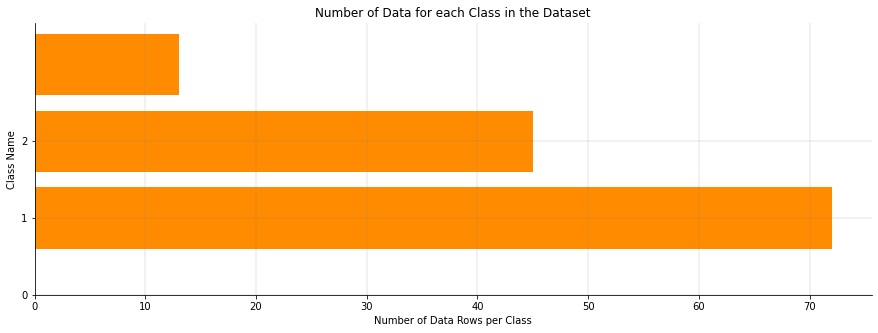

In [ ]:
ploting_charts_of_classes(mid_imb_wine_dataset, label_column="class")

In [ ]:
high_imb_wine_dataset = getImbalanceSubset(wine_dataset, label_column="class", imbalance_percentage=90)
high_imb_zoo_dataset = getImbalanceSubset(zoo_dataset, label_column="class", imbalance_percentage=90)
high_imb_breast_cancer_dataset = getImbalanceSubset(breast_cancer_dataset, label_column="class", imbalance_percentage=90)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc[index, col] = value


,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,1.546154,0.876586,0.344828,0.731246,0.621974,0.618708,0.648929,0.489552,0.500350,0.487258,0.334361,0.606910,0.729923,0.482276
std,0.572111,0.059410,0.148987,0.089800,0.109684,0.092190,0.146320,0.154083,0.168070,0.155518,0.126784,0.101901,0.140893,0.210017
min,1.000000,0.743763,0.127586,0.421053,0.353333,0.432099,0.283505,0.112205,0.212121,0.114525,0.098462,0.385965,0.322500,0.172619
25%,1.000000,0.828726,0.260776,0.681115,0.554167,0.543210,0.553479,0.384843,0.393939,0.391061,0.223846,0.538012,0.680625,0.295685
50%,2.000000,0.879973,0.298276,0.730650,0.616667,0.608025,0.670103,0.520669,0.454545,0.476257,0.332308,0.608187,0.740000,0.437500
75%,2.000000,0.927006,0.366810,0.787926,0.692500,0.666667,0.746134,0.596457,0.590909,0.565642,0.430769,0.660819,0.831250,0.640625
max,3.000000,1.000000,1.000000,1.000000,0.950000,1.000000,1.000000,1.000000,1.000000,1.000000,0.684615,1.000000,1.000000,1.000000


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc[index, col] = value



The Classes exists in dataset: [2. 1. 3.]

No of Data Rows having each class:
61 number of data rows for 2.0 class.
64 number of data rows for 1.0 class.
5 number of data rows for 3.0 class.


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.441176,0.196078,0.568627,0.421569,0.235294,0.343137,0.549020,0.607843,0.823529,0.784314,0.068627,0.176471,0.351716,0.754902,0.127451,0.450980,0.394958
std,0.498980,0.398989,0.497714,0.496249,0.426277,0.477101,0.500049,0.490642,0.383103,0.413329,0.254068,0.383103,0.255345,0.432270,0.335124,0.500049,0.298292
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.250000,1.000000,0.000000,0.000000,0.142857
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.375000,1.000000,0.000000,0.000000,0.285714
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.500000,1.000000,0.000000,1.000000,0.571429
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



The Classes exists in dataset: ['elephant' 'flamingo' 'aardvark' 'antelope' 'bass' 'bear' 'boar'
 'buffalo' 'calf' 'carp' 'catfish' 'cavy' 'cheetah' 'chicken' 'chub'
 'clam' 'crab' 'crayfish' 'crow' 'deer' 'dogfish' 'dolphin' 'dove' 'duck'
 'flea' 'fruitbat' 'giraffe' 'girl' 'gnat' 'goat' 'gorilla' 'gull'
 'haddock' 'hamster' 'hare' 'hawk' 'herring' 'honeybee' 'housefly' 'kiwi'
 'ladybird' 'lark' 'leopard' 'lion' 'lobster' 'lynx' 'mink' 'mole'
 'mongoose' 'moth' 'newt' 'octopus' 'opossum' 'oryx' 'ostrich' 'parakeet'
 'penguin' 'pheasant' 'pike' 'piranha' 'pitviper' 'platypus' 'polecat'
 'pony' 'porpoise' 'puma' 'pussycat' 'raccoon' 'reindeer' 'rhea'
 'scorpion' 'seahorse' 'seal' 'sealion' 'seasnake' 'seawasp' 'skimmer'
 'skua' 'slowworm' 'slug' 'sole' 'sparrow' 'squirrel' 'starfish'
 'stingray' 'swan' 'termite' 'toad' 'tortoise' 'tuatara' 'tuna' 'vampire'
 'vole' 'vulture' 'wallaby' 'wasp' 'wolf' 'worm' 'wren']

No of Data Rows having each class:
1 number of data rows for elephant cla

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc[index, col] = value


,deg-malig
count,225.000000
mean,1.924444
std,0.699858
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,3.000000



The Classes exists in dataset: ['no-recurrence-events' 'recurrence-events']

No of Data Rows having each class:
201 number of data rows for no-recurrence-events class.
24 number of data rows for recurrence-events class.


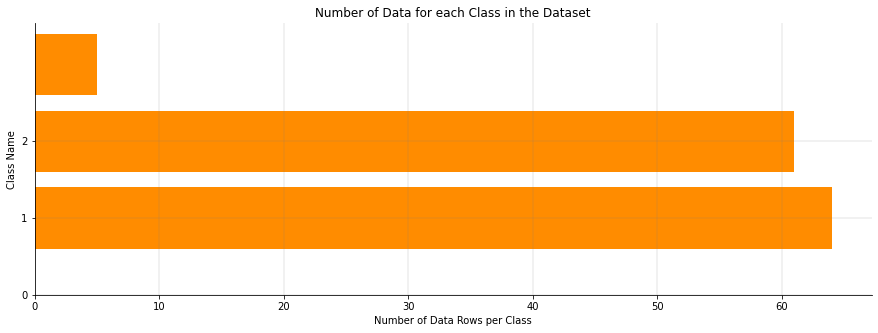

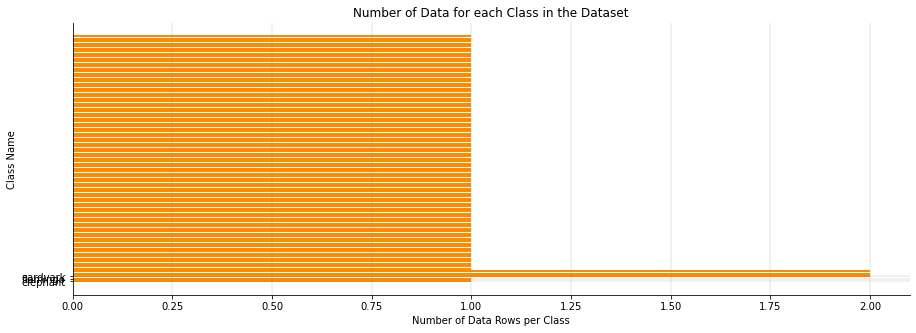

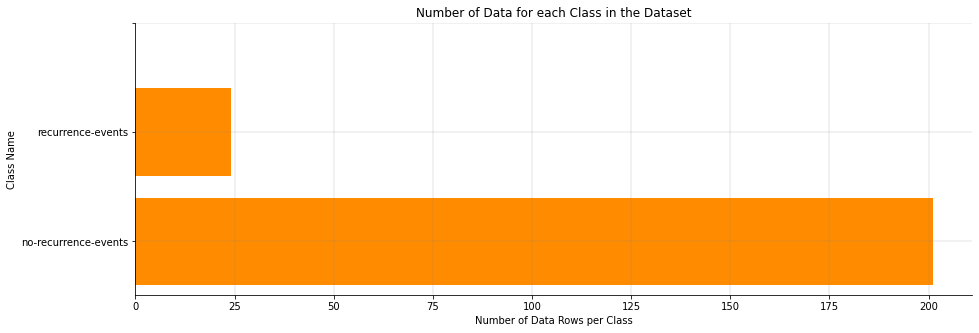

In [ ]:
ploting_charts_of_classes(high_imb_wine_dataset, label_column="class")
ploting_charts_of_classes(high_imb_zoo_dataset, label_column="class")
ploting_charts_of_classes(high_imb_breast_cancer_dataset, label_column="class")

In [ ]:
def get_features_labels(dataset, label_column):
    return dataset.drop(label_column, axis=1), dataset[label_column]


def train_and_test_model_with_KFolds(classifier, cross_validator, features, labels):
    actual_classes = np.empty([0], dtype=int)
    predicted_classes = np.empty([0], dtype=int)
    
    for train_index, test_index in cross_validator.split(features, labels):
        classifier.fit(features.iloc[train_index], labels.iloc[train_index])

        actual_classes = np.append(actual_classes, labels.iloc[test_index])
        predicted_classes = np.append(predicted_classes, classifier.predict(features.iloc[test_index]))
    
    return actual_classes, predicted_classes

def compute_and_plot_confusion_matrix(actual_classes, predicted_classes, labels):
    matrix = confusion_matrix(actual_classes, predicted_classes, labels=labels)
    
    cm_display = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=labels)
    fig, ax = plt.subplots(figsize=(8,8))
    cm_display.plot(cmap=plt.cm.Blues, ax=ax)

In [ ]:
# Step 2 cross validation or random forest ka
cross_validator = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
randomForestClassifier = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=6)
wine_features, wine_labels = get_features_labels(wine_dataset, label_column="class")
#zoo
zoo_features, zoo_labels = get_features_labels(zoo_dataset, label_column="class")
#breast_cancer
features, labels = get_features_labels(breast_cancer_dataset, label_column="class")

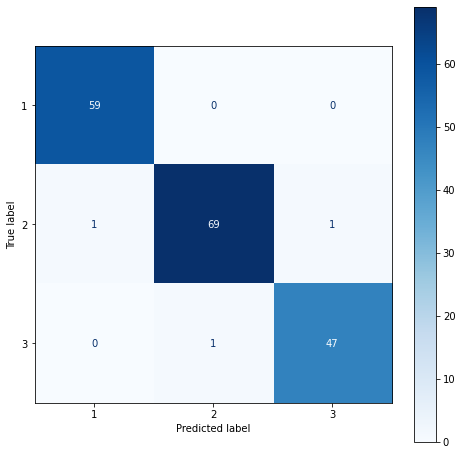

In [ ]:
wine_test_labels, pred_labels = train_and_test_model_with_KFolds(randomForestClassifier, cross_validator, wine_features, wine_labels)
# zoo_test_labels, pred_labels = train_and_test_model_with_KFolds(randomForestClassifier, cross_validator, zoo_features, zoo_labels)
# breast_cancer_test_labels, pred_labels = train_and_test_model_with_KFolds(randomForestClassifier, cross_validator, breast_cancer_features, breast_cancer_labels)


compute_and_plot_confusion_matrix(wine_test_labels, pred_labels, labels=wine_dataset["class"].unique())
#zoo
# compute_and_plot_confusion_matrix(wine_test_labels, pred_labels, labels=zoo_dataset["class"].unique())
#breast cancer
# compute_and_plot_confusion_matrix(wine_test_labels, pred_labels, labels=breast_cancer_dataset["class"].unique())



In [ ]:
def ploting_KData(metricsInfo, technique=""):

    k_values = [k for k, _ in metricsInfo.items()]
    k_scores = [score for _, score in metricsInfo.items()]

    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(k_values, k_scores, color="orangered", marker='o')

    plt.xlabel("No of Clusters")
    plt.ylabel("Score")
    ax.set_title(f"{technique} for finding best value of K")
    ax.set_xticks(k_values)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color="grey", linestyle='-', linewidth=0.25, alpha=0.85)

In [ ]:
def applyTechniquesOnKFoldsOfData(features, labels):
    cross_validator = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    
    unseen_fold_train_indexes = np.empty([0], dtype=int)
    unseen_fold_test_indexes = np.empty([0], dtype=int)
    train_fold_indexes = np.empty([0], dtype=int)
    test_fold_indexes = np.empty([0], dtype=int)
    
    kFold = 0
    for train_index, test_index in cross_validator.split(features, labels):
        if kFold == 0:
            unseen_fold_train_indexes = np.append(unseen_fold_train_indexes, train_index)
            unseen_fold_test_indexes = np.append(unseen_fold_test_indexes, test_index)
        else:
            train_fold_indexes = np.append(train_fold_indexes, train_index)
            test_fold_indexes = np.append(test_fold_indexes, test_index)
        
        kFold += 1
        
    
    return train_fold_indexes, test_fold_indexes, unseen_fold_train_indexes, unseen_fold_test_indexes

#             fold_features = features.iloc[train_index]
#             number_of_clusters = identifyNumberOfClusters(fold_features)
#             kmean_model = kMeanClusteringImplementation(number_of_clusters[0], fold_features)
            
#             for cluster in kmean_model.n_clusters:
# #                 if min_classes > 1:
# #                 trainRandomForestClassifier()
            
# #             last_fold_train_data = np.append(last_fold_train_data, train_index)
# #             last_fold_test_data = np.append(last_fold_test_data, test_index)
#             break

    
        
def MergeDataOfFolds():
    pass

def identifyNumberOfClusters(features):
    elbow_method_k = sorted(elbowMethodResult(features).items(), key=lambda x: x[1],reverse=False)
    
    return elbow_method_k[4]

def elbowMethodResult(features):
    k_metrices = {}
    for k in range(2, 11):
        kmean_classifier = KMeans(n_clusters=k).fit(features)
        k_metrices[k] = kmean_classifier.inertia_
    
    ploting_KData(k_metrices, technique="Elbow Method")
        

def avgSilhouteMethodResult(features):
    k_metrices = {}
    for k in range(2, 11):
        kmean_classifier = KMeans(n_clusters=k)
        kmean_cluster = kmean_classifier.fit_predict(features)
        avg_score = silhouette_score(features, kmean_cluster)
        
        k_metrices[k] = avg_score
    
    ploting_KData(k_metrices, technique="Silhoute Method")

def getClusterDetails():
    pass

def trainRandomForestClassifier():
    pass

def kMeanClusteringImplementation(k_clusters, features):
    kmean_classifier = KMeans(n_clusters=k_clusters).fit(features)
    
    return kmean_classifier

# Create 10 folds for each of the dataset
# data of 9 folds: merge them
## Using the Elbow method and Silhoute Method Find the number of cluster in the dataset
## Run K-means according to the selected number of clusters
#### For each cluster identify: centroid, number of samples of minority class
#### Train rando forest for each cluster which contains more then 1 class


In [ ]:
# Ab yeh sara step 3 or 4 hai isky nechy
train_fold_indexes, test_fold_indexes,\
unseen_fold_train_indexes, unseen_fold_test_indexes = applyTechniquesOnKFoldsOfData(features, labels)

In [ ]:
train_features = features.iloc[train_fold_indexes]
train_labels = labels.iloc[train_fold_indexes]

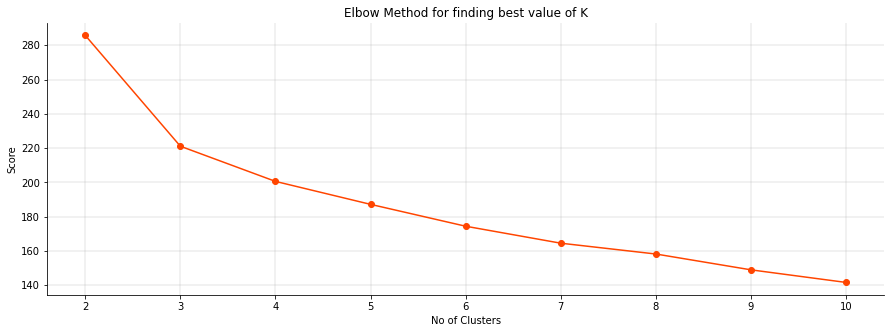

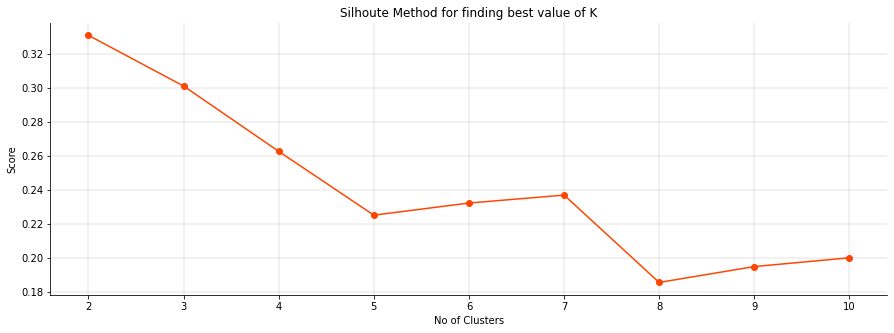

In [ ]:
elbowMethodResult(train_features)
avgSilhouteMethodResult(train_features)

In [ ]:
kmean_classifier_wine = KMeans(n_clusters=6)
cluster_labels_wine = kmean_classifier_wine.fit(train_features)

In [ ]:
cluster_labels_wine.cluster_centers_

array([[0.91950814, 0.30840838, 0.76057134, 0.58293701, 0.66344264,
        0.74341716, 0.5982831 , 0.43807502, 0.54132418, 0.42192063,
        0.62997728, 0.78826964, 0.66282479],
       [0.89549874, 0.52700866, 0.76028306, 0.72569787, 0.63528553,
        0.43970596, 0.18405997, 0.60314972, 0.37441176, 0.68902235,
        0.37043759, 0.39971675, 0.37444288],
       [0.81767523, 0.28229368, 0.73889449, 0.69932584, 0.55989041,
        0.49116761, 0.31451827, 0.75706503, 0.36177892, 0.23678911,
        0.64159275, 0.60641854, 0.31824171],
       [0.87950174, 0.66235632, 0.74394953, 0.70376344, 0.57692818,
        0.42100377, 0.12847134, 0.77484523, 0.26823151, 0.43401158,
        0.43023329, 0.45790323, 0.36463454],
       [0.83664932, 0.25240078, 0.65184882, 0.63144654, 0.58583741,
        0.57882708, 0.4112539 , 0.43499142, 0.44888795, 0.24679245,
        0.62317114, 0.70392453, 0.29769991],
       [0.85255437, 0.63688911, 0.72864557, 0.66235012, 0.60484945,
        0.67739005, 0.49218

In [ ]:
cluster_labels_wine.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
kmean_classifier_wine.fit_predict(train_features)

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
clusters_closets = pairwise_distances(cluster_labels_wine.cluster_centers_, train_features)

In [ ]:
cluster_details = []
for cluster in range(cluster_labels_wine.n_clusters):
    cluster_detailed_info = {}
    data_indexes_in_cluster = []
    index = 0
    cluster_detailed_info["K"] = cluster + 1
    cluster_detailed_info["centroid"] = cluster_labels_wine.cluster_centers_[cluster]
    
    for point in clusters_closets[cluster]:
        if point <= 0.24:
            data_indexes_in_cluster.append(index)
        index += 1
#     print(data_indexes_in_cluster)

    #Unique Classes in cluster
    labels_data = train_labels.iloc[data_indexes_in_cluster]
    unique_classes = np.unique(labels_data)
    cluster_detailed_info["total_classes"] = unique_classes
    if len(unique_classes) > 1:
        labels_info = {}
        for label in unique_classes:
            labels_info[label] = len(labels_data[labels_data == label])
        labels_info = sorted(labels_info.items(), key=lambda x:x[1])
        cluster_detailed_info["minority_class"] = labels_info[0][0]
        cluster_detailed_info["minority_class_count"] = labels_info[0][1]
        
        features_data = train_features.iloc[data_indexes_in_cluster]
        
        classifier = tRandomForestCLassifier(features_data, labels_data)
        cluster_detailed_info["classifier"] = classifier
        
    else:
        cluster_detailed_info["minority_class"] = unique_classes[0]
        cluster_detailed_info["minority_class_count"] = len(labels_data)
        cluster_detailed_info["classifier"] = None
    
    cluster_details.append(cluster_detailed_info)

In [ ]:
cluster_details

[{'K': 1,
  'centroid': array([0.92507008, 0.30885264, 0.75237057, 0.56893871, 0.6608952 ,
         0.74076557, 0.5946206 , 0.43195407, 0.54323972, 0.42688858,
         0.6320772 , 0.78545404, 0.6760717 ]),
  'classifier': None,
  'minority_class': 1,
  'minority_class_count': 104,
  'total_classes': array([1])},
 {'K': 2,
  'centroid': array([0.81767523, 0.28229368, 0.73889449, 0.69932584, 0.55989041,
         0.49116761, 0.31451827, 0.75706503, 0.36177892, 0.23678911,
         0.64159275, 0.60641854, 0.31824171]),
  'classifier': None,
  'minority_class': 2,
  'minority_class_count': 41,
  'total_classes': array([2])},
 {'K': 3,
  'centroid': array([0.89549874, 0.52700866, 0.76028306, 0.72569787, 0.63528553,
         0.43970596, 0.18405997, 0.60314972, 0.37441176, 0.68902235,
         0.37043759, 0.39971675, 0.37444288]),
  'classifier': None,
  'minority_class': 3,
  'minority_class_count': 57,
  'total_classes': array([3])},
 {'K': 4,
  'centroid': array([0.83546864, 0.26184226, 0.

In [ ]:
for cluster in cluster_details:
    if len(cluster["total_classes"]) > 1:
        

SyntaxError: ignored

In [ ]:
def tRandomForestCLassifier(features, labels):
    classifier = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=6)
    return classifier.fit(features, labels)

In [ ]:
unseen_features_fold = features.iloc[unseen_fold_train_indexes]
unseen_labels_fold = labels.iloc[unseen_fold_train_indexes]

In [ ]:
predicted_labels = []
for feature in unseen_features_fold.to_numpy():
    cluster_distances = pairwise_distances(cluster_labels_wine.cluster_centers_, feature.reshape(1,-1))
    close_clusters = {}
    for cluster in range(len(cluster_distances)):
        if cluster_distances[cluster] <= 0.38:
            close_clusters[cluster] = cluster_distances[cluster]
            
    choosen_cluster = sorted(close_clusters.items(), key=lambda x:x[1])
    display(choosen_cluster)
    # print(cluster_details[choosen_cluster])
    if len(choosen_cluster) > 0:
      if len(cluster_details[choosen_cluster[0][0]]["total_classes"]) > 1:
          predicted_labels.append(cluster_details[choosen_cluster[0][0]]["classifier"].predict(feature.reshape(1,-1)))
      else:
          predicted_labels.append(cluster_details[choosen_cluster[0][0]]["minority_class"])
    

[(0, array([0.28912752]))]

[]

[(4, array([0.28360437]))]

[(0, array([0.27882429]))]

[(0, array([0.23568364]))]

[(0, array([0.30325166]))]

[(0, array([0.19144365]))]

[(0, array([0.23689734]))]

[(0, array([0.30902078]))]

[(0, array([0.2007083]))]

[]

[]

[(0, array([0.27214785]))]

[(0, array([0.23797504]))]

[]

[(0, array([0.37061528]))]

[(0, array([0.30327361]))]

[(4, array([0.24714907]))]

[(0, array([0.28509763]))]

[(0, array([0.30587579]))]

[(0, array([0.34920067]))]

[]

[(0, array([0.22945754]))]

[(0, array([0.34389127]))]

[(0, array([0.27757392]))]

[(0, array([0.23605151]))]

[(0, array([0.29216479]))]

[(0, array([0.28741238]))]

[(0, array([0.31260565]))]

[]

[(0, array([0.25659033]))]

[(0, array([0.21066596]))]

[(0, array([0.31708448]))]

[(0, array([0.29885095]))]

[(0, array([0.32901491])), (3, array([0.36901127]))]

[]

[(4, array([0.36305121]))]

[(4, array([0.21627249]))]

[(0, array([0.23350053]))]

[]

[(0, array([0.35836468]))]

[(0, array([0.24299047]))]

[(0, array([0.19857359]))]

[(0, array([0.30024622]))]

[]

[(0, array([0.24247816]))]

[(0, array([0.34437819]))]

[(0, array([0.26425828]))]

[(0, array([0.21671538]))]

[(0, array([0.25091996]))]

[(0, array([0.19919669]))]

[(0, array([0.1806746]))]

[(0, array([0.30808437]))]

[]

[]

[]

[(3, array([0.33504314]))]

[]

[(1, array([0.287554]))]

[(3, array([0.34335375]))]

[]

[(3, array([0.2943712]))]

[]

[]

[]

[]

[(3, array([0.28715023]))]

[]

[]

[(3, array([0.36389731])), (1, array([0.37004165]))]

[(1, array([0.33277009]))]

[]

[(3, array([0.28570239]))]

[(3, array([0.21294237]))]

[(1, array([0.27993187])), (3, array([0.37727394]))]

[(5, array([0.32177644]))]

[(3, array([0.3394415]))]

[(3, array([0.1862876]))]

[(1, array([0.21316099])), (3, array([0.37982329]))]

[(1, array([0.34819749]))]

[(1, array([0.16842507]))]

[(1, array([0.31712683])), (3, array([0.36647856]))]

[(1, array([0.19479132]))]

[(3, array([0.33015593])), (4, array([0.37483604]))]

[(3, array([0.31195402]))]

[]

[]

[(3, array([0.2062293]))]

[]

[]

[(3, array([0.25728275]))]

[(3, array([0.29386984]))]

[(3, array([0.32098578])), (4, array([0.35271137]))]

[(3, array([0.26127445])), (1, array([0.33393108]))]

[(3, array([0.24157179]))]

[]

[(3, array([0.25013816])), (1, array([0.33684784]))]

[(1, array([0.23141144]))]

[(3, array([0.28026405]))]

[]

[]

[(3, array([0.27953121]))]

[(1, array([0.33911529]))]

[(1, array([0.27731257])), (3, array([0.33284877]))]

[(1, array([0.35320049])), (3, array([0.36289344]))]

[]

[(3, array([0.23227251]))]

[(3, array([0.22454367])), (1, array([0.36265528]))]

[(5, array([0.37071535]))]

[]

[]

[]

[(3, array([0.30530846]))]

[]

[(1, array([0.37908928]))]

[(3, array([0.32750014])), (1, array([0.37708142]))]

[]

[]

[]

[]

[]

[]

[(5, array([0.35738125]))]

[(5, array([0.2829703]))]

[]

[(5, array([0.16911389]))]

[(5, array([0.29750461]))]

[(5, array([0.25913294]))]

[]

[(5, array([0.26357276]))]

[(5, array([0.26764233]))]

[(2, array([0.34023705]))]

[(5, array([0.27465805]))]

[(5, array([0.25347771])), (2, array([0.36596794]))]

[(2, array([0.14763327])), (5, array([0.31144282]))]

[(2, array([0.2452532]))]

[(2, array([0.36329887]))]

[(2, array([0.33780929]))]

[]

[]

[]

[]

[]

[]

[]

[(5, array([0.28063937])), (2, array([0.31912473]))]

[(5, array([0.22034413]))]

[(5, array([0.22640137]))]

[(5, array([0.23365753])), (2, array([0.35015848]))]

[(2, array([0.18859105]))]

[(5, array([0.20047852]))]

[(2, array([0.23936972]))]

[(2, array([0.22933008]))]

[(2, array([0.1954647]))]

[]

[(2, array([0.34200307]))]

[(5, array([0.3712972]))]

[(2, array([0.22616898])), (5, array([0.26499086]))]

[(2, array([0.30534797]))]

[(2, array([0.35349047]))]

In [ ]:
predicted_labels

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]